In [1]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


2024-04-07 21:42:25.540537: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-07 21:42:25.540589: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-07 21:42:25.580122: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-07 21:42:26.056889: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-07 21:42:28.136402: W tensorflow/compiler/tf2

In [2]:
# Load the IMDb dataset
data = pd.read_csv('IMDB Dataset.csv')

# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
print(data.head())

# Check the shape of the dataset (number of rows and columns)
print("\nShape of the dataset:", data.shape)

# Check the distribution of sentiment labels
print("\nDistribution of sentiment labels:")
print(data['sentiment'].value_counts())


First few rows of the dataset:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Shape of the dataset: (50000, 2)

Distribution of sentiment labels:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [3]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=10000)  # Limit vocabulary size to 10,000 words
tokenizer.fit_on_texts(data['review'])
sequences = tokenizer.texts_to_sequences(data['review'])

# Pad sequences to ensure uniform length for input into the RNN model
X = pad_sequences(sequences, maxlen=100)  # Pad sequences to maximum length of 100

In [4]:
from sklearn.model_selection import train_test_split

# Convert sentiment labels to binary format (0 for negative, 1 for positive)
y = (data['sentiment'] == 'positive').astype(int)

# Split the dataset into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2


In [5]:
# Import TensorFlow/Keras for building the RNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [6]:
# Define the RNN model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=100))  # Input layer with embedding
model.add(LSTM(64))  # LSTM layer with 64 units
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))


Epoch 1/5
469/469 [==============================] - 27s 54ms/step - loss: 0.4050 - accuracy: 0.8100 - val_loss: 0.3273 - val_accuracy: 0.8608
Epoch 2/5
469/469 [==============================] - 27s 57ms/step - loss: 0.2576 - accuracy: 0.8964 - val_loss: 0.3368 - val_accuracy: 0.8568
Epoch 3/5
469/469 [==============================] - 25s 53ms/step - loss: 0.1924 - accuracy: 0.9252 - val_loss: 0.3447 - val_accuracy: 0.8575
Epoch 4/5
469/469 [==============================] - 24s 51ms/step - loss: 0.1380 - accuracy: 0.9491 - val_loss: 0.4177 - val_accuracy: 0.8596
Epoch 5/5
469/469 [==============================] - 25s 53ms/step - loss: 0.1087 - accuracy: 0.9605 - val_loss: 0.4481 - val_accuracy: 0.8542


In [7]:
# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


313/313 [==============================] - 3s 9ms/step - loss: 0.4764 - accuracy: 0.8421
Test Loss: 0.4764484763145447
Test Accuracy: 0.8421000242233276


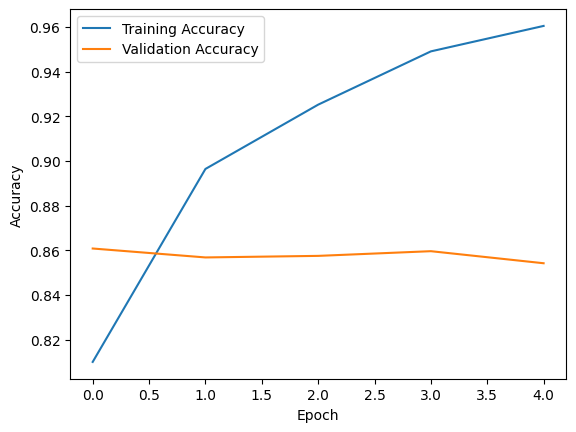

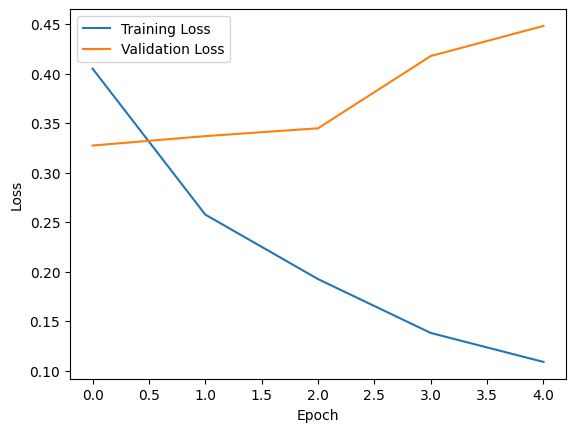

In [8]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [9]:
# Preprocess the new user input (replace 'user_input' with the actual user review)
user_input = "This movie was amazing! I loved every moment of it."
new_sequence = tokenizer.texts_to_sequences([user_input])
new_X = pad_sequences(new_sequence, maxlen=100)

# Use the trained model to make predictions on the new input
prediction = model.predict(new_X)[0][0]

# Interpret the prediction
threshold = 0.5
sentiment = 'Positive' if prediction >= threshold else 'Negative'

# Display the result to the user
print(f"The predicted sentiment for the user review '{user_input}' is: {sentiment} (Probability: {prediction:.4f})")


1/1 [==============================] - 0s 307ms/step
The predicted sentiment for the user review 'This movie was amazing! I loved every moment of it.' is: Positive (Probability: 0.9383)
